In [67]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt # untuk visualisasi
import seaborn as sns # untuk visualisasi
import random

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler #scaling
from sklearn.metrics import accuracy_score, classification_report
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import SMOTE

## **Load Data**

In [46]:
diabetes = pd.read_csv('/content/diabetes use.csv')
diabetes

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1
...,...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1


## **Pre-Processing**

In [47]:
diabetes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [48]:
diabetes.shape

(768, 9)

In [49]:
diabetes.isnull().sum()

,0
Pregnancies,0
Glucose,0
BloodPressure,0
SkinThickness,0
Insulin,0
BMI,0
DiabetesPedigreeFunction,0
Age,0
Outcome,0


In [50]:
diabetes.duplicated().sum()

np.int64(0)

In [51]:
diabetes.describe().T

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BloodPressure,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
SkinThickness,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DiabetesPedigreeFunction,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


## **Handling Outlier**

In [52]:
# Function to count outlier using IQR
# handling outlier
def count_outlier_iqr(data):
  Q1 = data.quantile(0.25)
  Q3 = data.quantile(0.75)
  IQR = Q3-Q1
  lower_bound = Q1 - 1.5 * IQR
  upper_bound = Q3 + 1.5 * IQR
  return ((data < lower_bound) | (data > upper_bound)).sum() #ketika data < batas bawah/ > batas atas -> dilakukan penjumlahan thd data" tsb

# Count outlier in each numerical column
outlier_counts = {}
for col in diabetes.select_dtypes(include=['int64', 'float64']).columns:
  outlier_counts[col] = count_outlier_iqr(diabetes[col])

# Convert the result into a DataFrame for easier viewing
outlier_counts_diabetes = pd.DataFrame(list(outlier_counts.items()), columns=['Column', 'Outlier Count'])

#Display the outlier counts DataFrame
outlier_counts_diabetes

,Column,Outlier Count
0,Pregnancies,4
1,Glucose,5
2,BloodPressure,45
3,SkinThickness,1
4,Insulin,34
5,BMI,19
6,DiabetesPedigreeFunction,29
7,Age,9
8,Outcome,0


In [53]:
diabetes['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


Text(0.5, 0.98, 'Histograms of Diabetes Dataset Features')

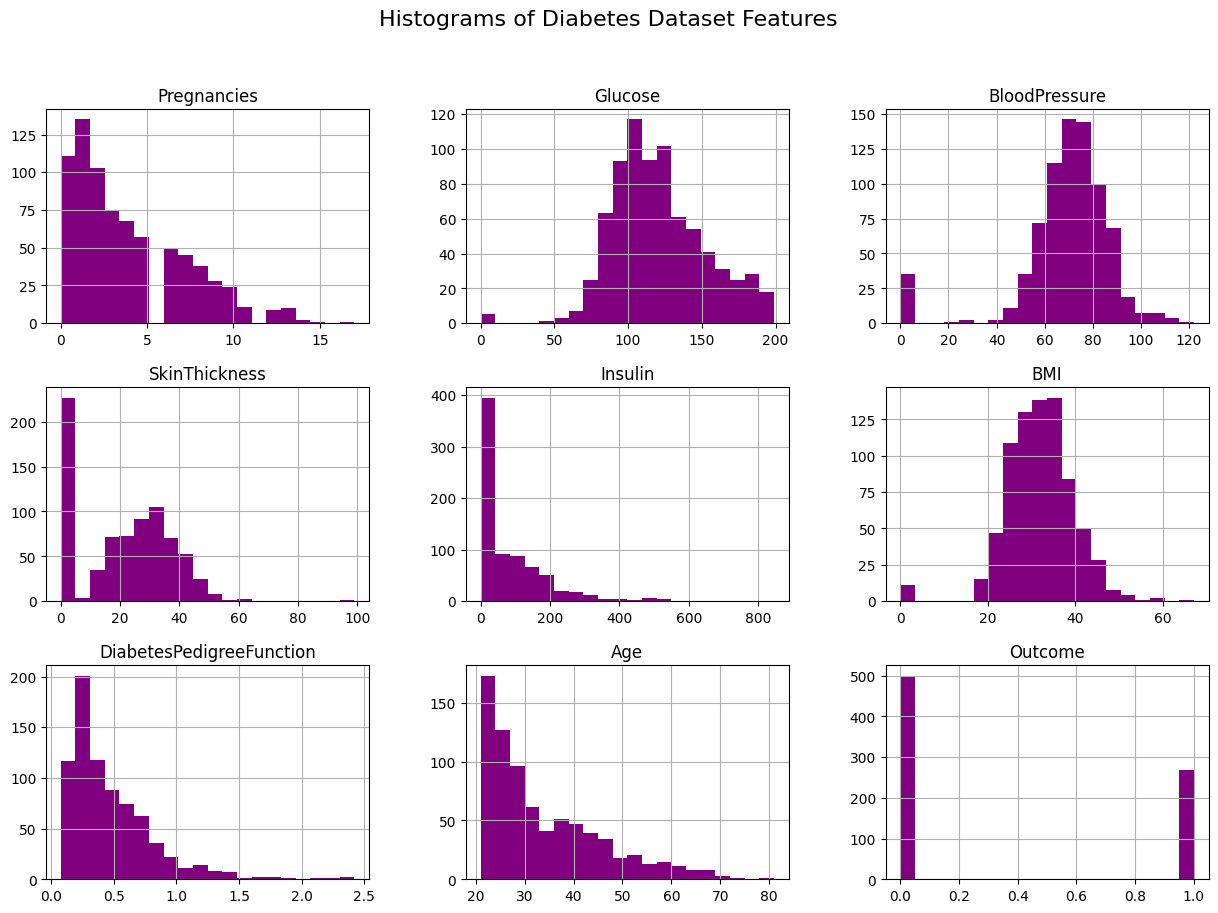

In [54]:
diabetes.hist(bins=20, figsize=(15, 10), layout=(3, 3), color = 'purple');
plt.suptitle('Histograms of Diabetes Dataset Features', fontsize=16)

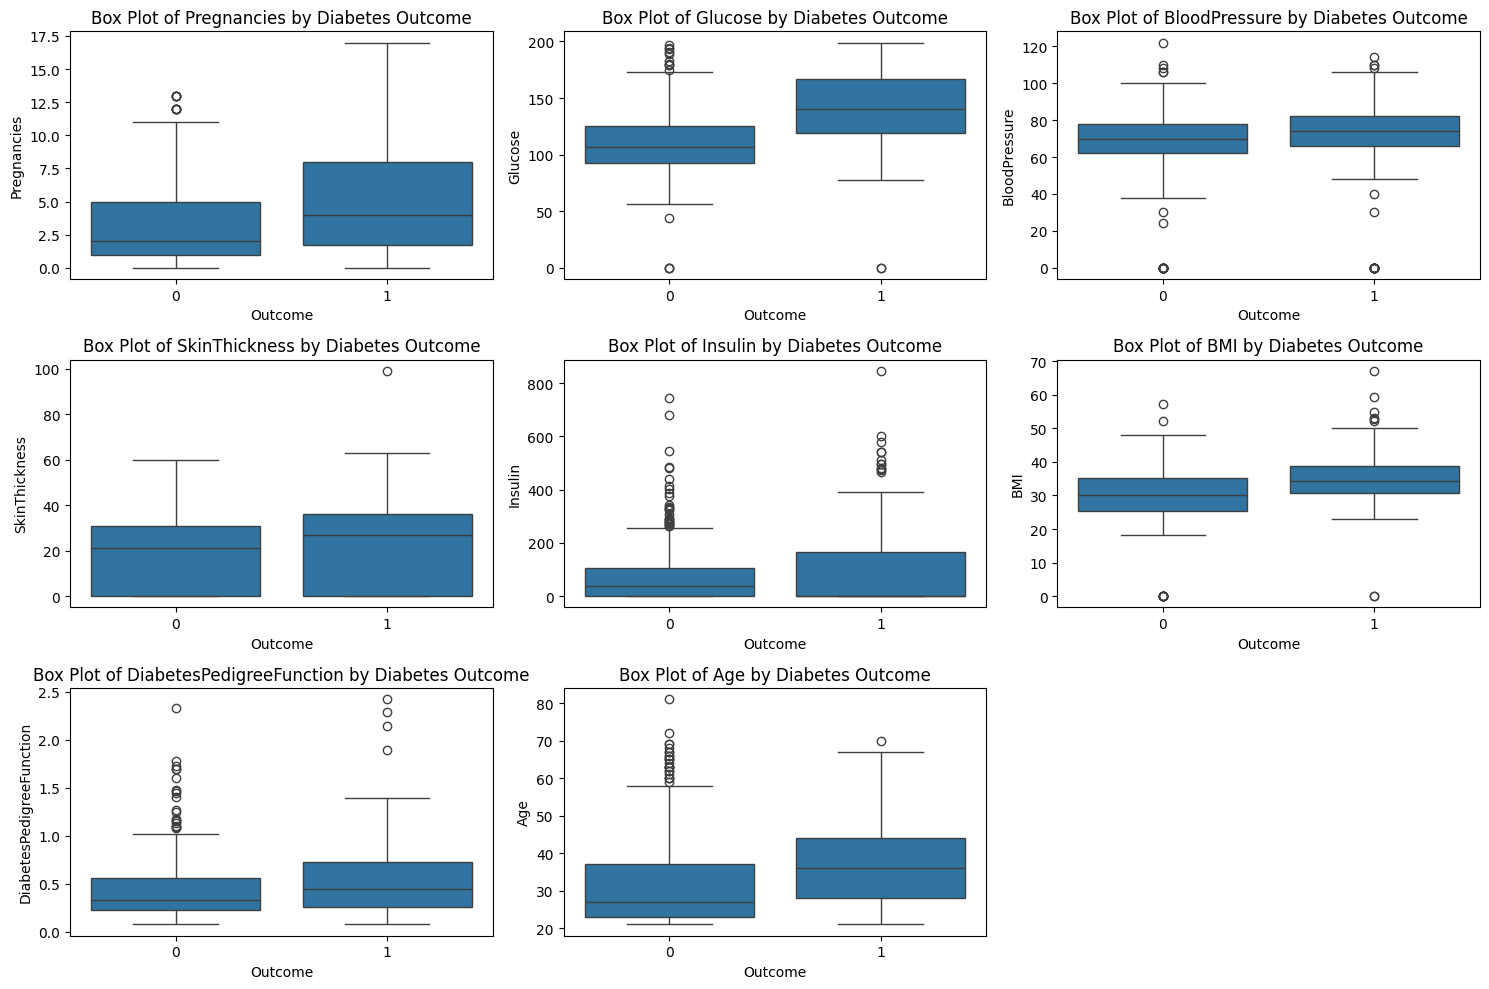

In [55]:
def plot_boxplots(data):
  plt.figure(figsize=(15,10))
  for i, column in enumerate(data.columns[:-1]):
    plt.subplot(3, 3, i+1)
    sns.boxplot(x='Outcome', y =column, data=data)
    plt.title(f'Box Plot of {column} by Diabetes Outcome')
  plt.tight_layout()
  plt.show()

plot_boxplots(diabetes)

<Axes: >

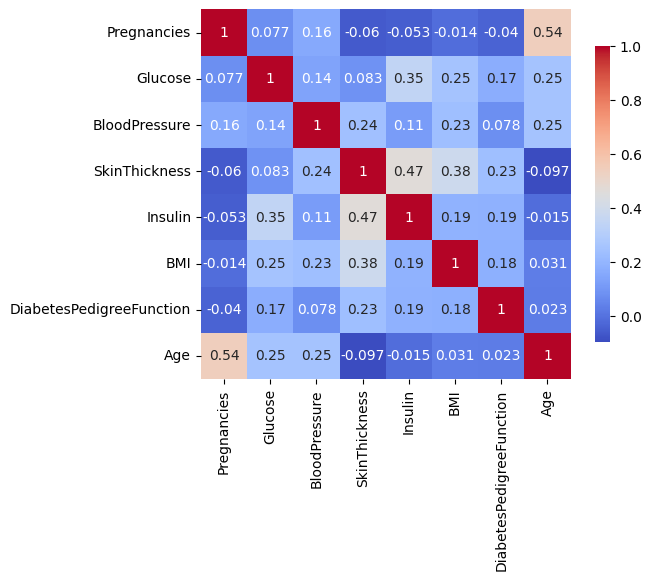

In [68]:
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', square=True, cbar_kws={"shrink" : .8})

### **Resampling**

In [56]:
X = diabetes.drop('Outcome', axis=1)
X

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33
...,...,...,...,...,...,...,...,...
763,10,101,76,48,180,32.9,0.171,63
764,2,122,70,27,0,36.8,0.340,27
765,5,121,72,23,112,26.2,0.245,30
766,1,126,60,0,0,30.1,0.349,47


In [57]:
y=diabetes['Outcome']
y

,Outcome
0,1
1,0
2,1
3,0
4,1
...,...
763,0
764,0
765,0
766,1


In [58]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
# x_train latihan soal, y_train ujiannya
# test_size = 20%
# random_state = acak soalnya

### **Handling**

In [59]:
smote = SMOTE(random_state=42)
x_resampled, y_resampled = smote.fit_resample(x,y)

<Axes: xlabel='count', ylabel='Outcome'>

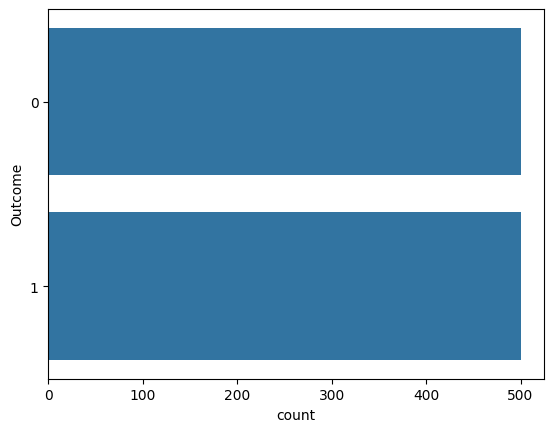

In [60]:
sns.countplot(data=x_resampled, y=y_resampled)

### **Feature Scalling**

In [61]:
scaler = StandardScaler()
diabetes = x_resampled.copy()
diabetes[diabetes.columns.difference(['Outcome'])] = scaler.fit_transform(diabetes[diabetes.columns.difference(['Outcome'])])

In [62]:
diabetes.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,0.632942,0.704599,0.148120,0.875763,-0.719241,0.121592,0.384989,1.41593
1,-0.885633,-1.260506,-0.154887,0.502436,-0.719241,-0.811232,-0.438799,-0.26234
2,1.240373,1.796324,-0.255890,-1.301978,-0.719241,-1.250992,0.519302,-0.17401
3,-0.885633,-1.135737,-0.154887,0.129109,0.079048,-0.611341,-0.987991,-1.14564
4,-1.189349,0.361486,-1.467921,0.875763,0.707487,1.387567,5.342639,-0.08568


## **Model**